In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
results = pd.read_csv('data/results.csv')
opt_results = pd.read_csv('data/results-opt.csv')

In [28]:
def mean_abs(series):
    return series.abs().mean()

def mean_square(series):
    return series.pow(2).mean()


groups_rest = results.groupby(['noise_distribution', 'slope', 'm', 'k'])
groups_opt = opt_results.groupby(['noise_distribution', 'slope', 'm', 'k'])

mean_abs_rest = groups_rest.agg(mean_abs).reset_index()
mean_square_rest = groups_rest.agg(mean_square).reset_index()
mean_abs_opt = groups_opt.agg(mean_abs).reset_index()
mean_square_opt = groups_opt.agg(mean_square).reset_index()

In [29]:
def plot_data(square, noise_dist_index, slope, m):

    if square:
        rest_data = mean_square_rest
        opt_data = mean_square_opt
    else:
        rest_data = mean_abs_rest
        opt_data = mean_abs_opt

    noise_dist = rest_data.noise_distribution.unique()[noise_dist_index]
    print(noise_dist)


    rest_data_filtered = rest_data[(rest_data.noise_distribution == noise_dist)
                                & (rest_data.slope == slope)
                                & (rest_data.m == m)]


    x_vals = [str(i) for i in rest_data.k.unique()]
    for alg in ['all', 'partition']:
        y_vals = rest_data_filtered[alg]
        plt.plot(x_vals, y_vals, label = alg)

    opt_data_filtered = opt_data[(opt_data.noise_distribution == noise_dist)
                                & (opt_data.slope == slope)
                                & (opt_data.m == m)]
    opt_vals = opt_data_filtered.opt
    plt.plot(x_vals[:len(opt_vals)], opt_vals, label = 'opt')

    plt.yscale('log')
    plt.legend(loc="upper right")
    plt.show()

uniform(-1,1)


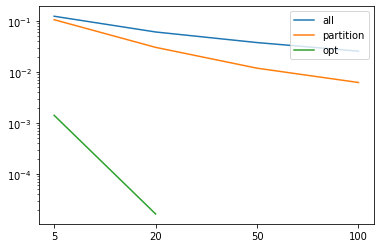

In [30]:
square = False
noise_dist_index = 3
slope = 1
m = 3

plot_data(square, noise_dist_index, slope, m)
